**Telecom Churn Predection**

In [2]:
!wget https://www.dropbox.com/s/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv

--2021-02-22 06:55:44--  https://www.dropbox.com/s/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv [following]
--2021-02-22 06:55:45--  https://www.dropbox.com/s/raw/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2b0d30997c494f9be6098a5e86.dl.dropboxusercontent.com/cd/0/inline/BJblje3vSFG6aT4zz50NnQOAggin_P3QHl9QPQLjJIpTcR-izooDu2zLf93Gc3-k8acA-F3XZUkWOIuQicfxAMY3Oaa3Lw4bh81Erbdxc5_YKMrlYjqb3vpC9YeUgWLE654/file# [following]
--2021-02-22 06:55:45--  https://uc2b0d30997c494f9be6098a5e86.dl.dropboxusercontent.com/cd/0/inline/BJblje3vSFG6aT4zz50Nn

In [3]:
import pandas as pd
import numpy as np
df =pd.read_csv("/content/datasets-255093-535845-churn-bigml-80.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
df.shape

(2666, 20)

In [6]:
print(len(df['State'].unique()))
print(df['International plan'].unique())
print(df['Voice mail plan'].unique())
print(df['Churn'].unique())

51
['No' 'Yes']
['Yes' 'No']
[False  True]


In [7]:
df.replace({'International plan':{'No':0,'Yes':1},
            'Voice mail plan':{'No':0,'Yes':1},
            'Churn':{False:0,True:1}},inplace=True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [9]:
state_churn=df.groupby(['State'])['Churn'].agg('mean')
state_churn['AK']

0.06976744186046512

In [10]:
df['state_churn']=df['State'].map(state_churn)

In [11]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.192308
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.151515
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.280000
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0.151515
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.134615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0,0.224490
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0.066667
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0.079545
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0.062500


In [12]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.192308
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.151515
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.280000
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0.151515
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.134615


In [13]:
df[df['State']=='KS']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.192308
145,KS,70,408,0,0,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,0,0.192308
231,KS,137,408,0,0,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,0,0.192308
299,KS,132,415,0,0,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,0,0.192308
308,KS,127,415,0,0,0,221.0,100,37.57,160.7,113,13.66,233.1,96,10.49,6.8,4,1.84,2,0,0.192308
314,KS,137,415,0,0,0,230.2,113,39.13,220.4,79,18.73,204.7,111,9.21,10.7,7,2.89,4,0,0.192308
348,KS,46,510,0,0,0,250.3,100,42.55,260.6,90,22.15,195.0,104,8.78,13.3,2,3.59,2,1,0.192308
365,KS,86,408,0,1,23,225.5,107,38.34,246.3,105,20.94,245.7,81,11.06,9.8,2,2.65,0,0,0.192308
407,KS,143,408,0,1,24,186.6,69,31.72,222.0,116,18.87,234.9,138,10.57,11.6,5,3.13,1,0,0.192308
493,KS,110,415,1,0,0,293.3,79,49.86,188.5,90,16.02,266.9,91,12.01,14.5,4,3.92,0,1,0.192308


In [14]:
df['avg_day_call_dur'] =df['Total day minutes']/df['Total day calls']
df['avg_night_call_dur'] =df['Total night minutes']/df['Total night calls']
df['avg_evng_call_dur'] =df['Total eve minutes']/df['Total eve calls']

In [15]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn,avg_day_call_dur,avg_night_call_dur,avg_evng_call_dur
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.192308,2.410000,2.689011,1.993939
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.151515,1.313821,2.469903,1.898058
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.280000,2.135088,1.563462,1.101818
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0.151515,4.216901,2.212360,0.703409
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.134615,1.475221,1.544628,1.215574


In [16]:
df.drop(columns=["Total day minutes",'Total day calls','Total night minutes','Total night calls','Total eve minutes','Total eve calls'],inplace=True)

In [38]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day charge,Total eve charge,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn,avg_day_call_dur,avg_night_call_dur,avg_evng_call_dur
0,KS,128,415,0,1,25,45.07,16.78,11.01,10.0,3,2.70,1,0,0.192308,2.410000,2.689011,1.993939
1,OH,107,415,0,1,26,27.47,16.62,11.45,13.7,3,3.70,1,0,0.151515,1.313821,2.469903,1.898058
2,NJ,137,415,0,0,0,41.38,10.30,7.32,12.2,5,3.29,0,0,0.280000,2.135088,1.563462,1.101818
3,OH,84,408,1,0,0,50.90,5.26,8.86,6.6,7,1.78,2,0,0.151515,4.216901,2.212360,0.703409
4,OK,75,415,1,0,0,28.34,12.61,8.41,10.1,3,2.73,3,0,0.134615,1.475221,1.544628,1.215574


In [17]:
print(df.avg_day_call_dur.max())
print(df.avg_evng_call_dur.max())
print(df.avg_night_call_dur.max())

6.493181818181818
15.608333333333334
7.124242424242424


In [18]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day charge          0
Total eve charge          0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
state_churn               0
avg_day_call_dur          2
avg_night_call_dur        0
avg_evng_call_dur         1
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day charge          0
Total eve charge          0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
state_churn               0
avg_day_call_dur          0
avg_night_call_dur        0
avg_evng_call_dur         0
dtype: int64

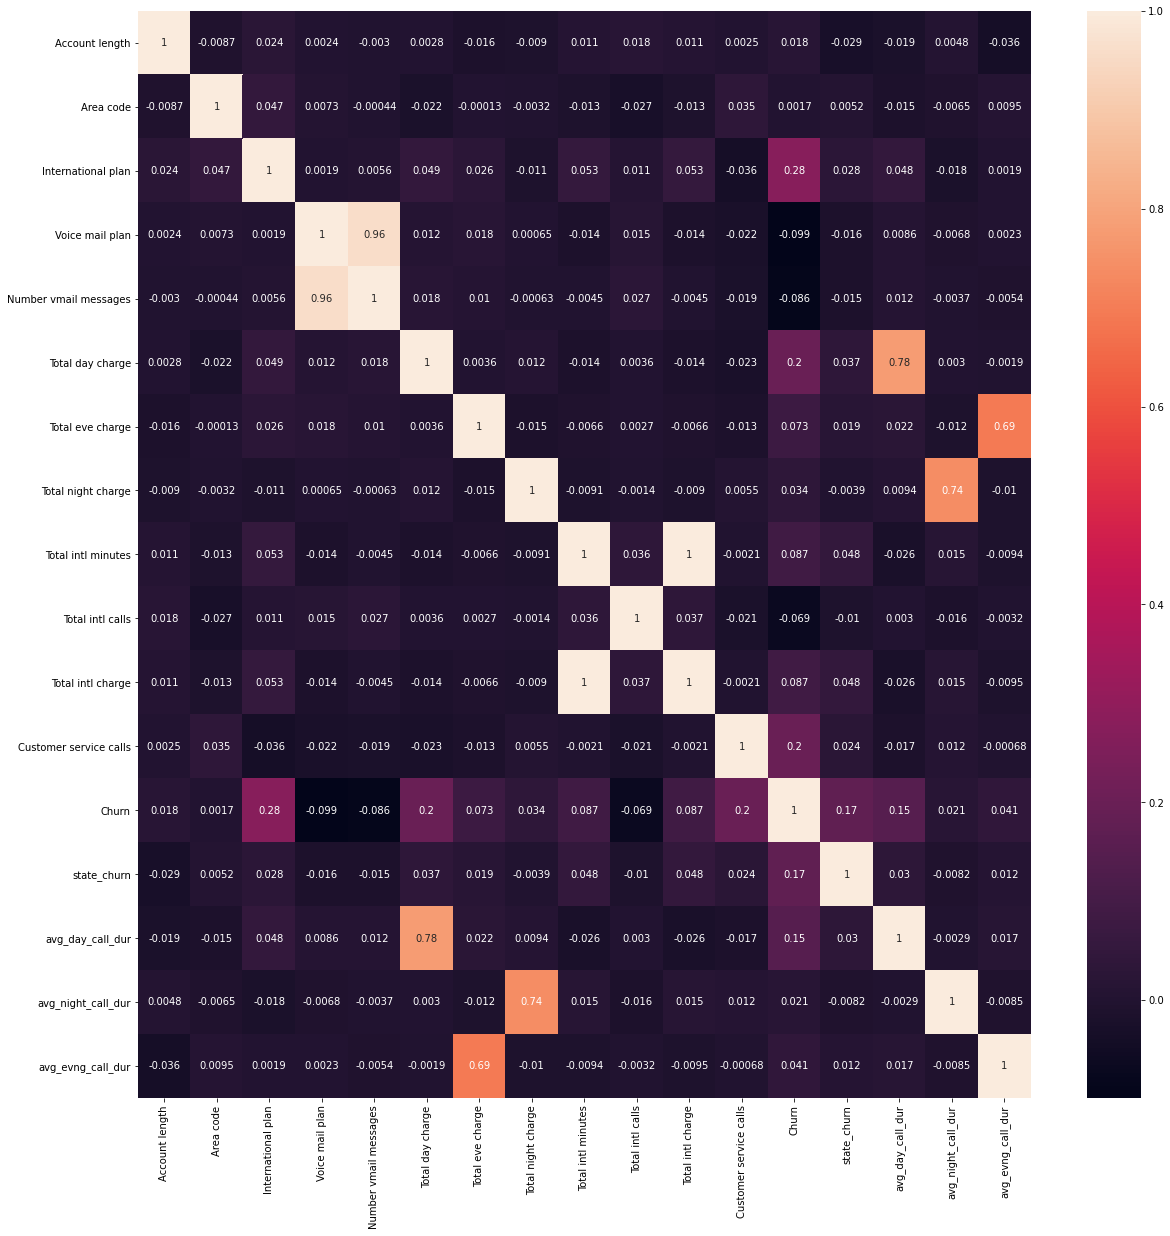

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(20,20))
correlation=df.corr()
sns.heatmap(correlation,annot=True,ax=ax)

In [52]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day charge,Total eve charge,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn,avg_day_call_dur,avg_night_call_dur,avg_evng_call_dur
0,128,415,0,1,25,45.07,16.78,11.01,10.0,3,2.70,1,0,0.192308,2.410000,2.689011,1.993939
1,107,415,0,1,26,27.47,16.62,11.45,13.7,3,3.70,1,0,0.151515,1.313821,2.469903,1.898058
2,137,415,0,0,0,41.38,10.30,7.32,12.2,5,3.29,0,0,0.280000,2.135088,1.563462,1.101818
3,84,408,1,0,0,50.90,5.26,8.86,6.6,7,1.78,2,0,0.151515,4.216901,2.212360,0.703409
4,75,415,1,0,0,28.34,12.61,8.41,10.1,3,2.73,3,0,0.134615,1.475221,1.544628,1.215574


In [22]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Churn','State'],axis=1)
y=df['Churn']
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=7,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2130, 16)
(533, 16)
(2130,)
(533,)


**Perform K-Fold cross validation**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold

cv =StratifiedKFold(10)
Rf=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=7)
Dt=DecisionTreeClassifier()
scorerf=cross_val_score(Rf,X_train,y_train,cv=cv)
scoredt=cross_val_score(Dt,X_train,y_train,cv=cv)
print(scorerf.mean())
print(scoredt.mean())

0.9427230046948356
0.8967136150234742


**Perform Grid Search cross validation to Þnd the best parameters for Random Forest ClassiÞer()**

In [24]:
from sklearn.model_selection import GridSearchCV
params =[{'n_estimators':range(20,100,20),'max_depth':range(3,15),'max_features':range(4,17)}]
gridsearchcv=GridSearchCV(Rf,params,cv=5,n_jobs=-1,verbose=True,return_train_score=True,scoring='recall')
gridsearchcv.fit(X_train,y_train)

Fitting 5 folds for each of 624 candidates, totalling 3120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 3120 out of 3120 | elapsed: 17.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=7,
                                     

In [25]:
gridsearchcv.best_params_


{'max_depth': 14, 'max_features': 13, 'n_estimators': 60}

In [26]:
gridsearchcv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features=13,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [27]:
gridsearchcv.best_score_

0.7484848484848484

In [30]:
final_model=gridsearchcv.best_estimator_
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[469   3]
 [ 20  41]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       472
           1       0.93      0.67      0.78        61

    accuracy                           0.96       533
   macro avg       0.95      0.83      0.88       533
weighted avg       0.96      0.96      0.95       533



In [36]:
from  numpy import argsort
imp=final_model.feature_importances_
x=argsort(imp)[::-1]
print(x)

final_model.feature_importances_
col_names=list(df.columns)
col_names.remove('State')
col_names.remove('Churn')
top_featurs=list()
for i in x[:13]:
  top_featurs.append(col_names[i])
print(top_featurs)


[ 5 11  6  2  9  8 15 10 13  7 14  4 12  3  0  1]
['Total day charge', 'Customer service calls', 'Total eve charge', 'International plan', 'Total intl calls', 'Total intl minutes', 'avg_evng_call_dur', 'Total intl charge', 'avg_day_call_dur', 'Total night charge', 'avg_night_call_dur', 'Number vmail messages', 'state_churn']


In [37]:
X_new=df[top_featurs]

In [42]:
new_model=gridsearchcv.best_estimator_
score=cross_val_score(new_model,X_new,y,cv=5)
print(f'New: {score.mean()}')
print(f'old:{scorerf.mean()}')

New: 0.9463069023402785
old:0.9427230046948356
